In [1]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import torch
from src.d05_regression_model import Trainer

torch.use_deterministic_algorithms(True) 

In [2]:
trainer = Trainer('cuda', tracking=True, experiment='Assembly Inspector Counter')

In [3]:
#model = trainer.train_model(folder='./data/temp/counting_imgs/screwdriver/scale_0.35', part='screwdriver', num_in_assembly=1)

In [3]:
model = trainer.train_model(folder='./data/temp/counting_imgs/wheels_five/scale_0.2', part='screw', num_in_assembly=5)

Training...
Unsuccessful training with final 587 errors


Registered model '._data_temp_counting_imgs_wheels_five_scale_0.2_screw_counter' already exists. Creating a new version of this model...
Created version '30' of model '._data_temp_counting_imgs_wheels_five_scale_0.2_screw_counter'.


🏃 View run ._data_temp_counting_imgs_wheels_five_scale_0.2_screw_counter at: http://127.0.0.1:8080/#/experiments/328240355732496405/runs/787e7daafd324323bab2d37e123b9fa8
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/328240355732496405


In [1]:
from pytorch_grad_cam import (
    GradCAM,
    HiResCAM,
    ScoreCAM,
    GradCAMPlusPlus,
    AblationCAM,
    XGradCAM,
    FullGrad,
)
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from torchvision.transforms.functional import to_pil_image
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
import torchvision.transforms.v2 as transforms
import random
import matplotlib.patches as patches
from mlflow import MlflowClient
import mlflow
import os
import torch
from src.d02_binary_model import Trainer, CustomImageFolder
os.environ["MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR"] = "false"
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")


def gradcam(path, part, l_idx, img_idx=None, img_folder=None, model_name=None, model_version=None):
    if model_name is None:
        model_name = path[:path.rfind(part)+len(part)]
        model_name = model_name.replace("/", "_")
        model_name += "_counter"
    client = MlflowClient()
    if model_version is None:
        model_version = client.search_model_versions(f'name="{model_name}"')[0].version
    
    model = mlflow.pytorch.load_model(f'models:/{model_name}/{model_version}').to('cpu') 
    model.eval()    

    img_channels = Trainer.get_img_shape(f"{path}/0")[0]
    transform = transforms.Compose(
        [
            transforms.ToImage(),
            transforms.ToDtype(torch.float32, scale=True),
            transforms.Normalize([0.5] * img_channels, [0.5] * img_channels),
        ]
    )

    if img_folder is not None:
        path = img_folder

    ds = CustomImageFolder(path, transform=transform)
    if img_idx is None:
        img_idx = random.randint(0, len(ds) - 1)

    input_tensor = ds[img_idx][0].unsqueeze(0)

    img = ds[img_idx][0] * 0.5 + 0.5
    img = img.clamp(0, 1)

    if img_channels == 1:
        img = img.squeeze(0).numpy()  # shape (H, W)
        img = np.repeat(img[:, :, np.newaxis], 3, axis=2)  # shape (H, W, 3)
    else:
        img = img.permute(1, 2, 0).numpy()
    
    #print(model.layers)
    target_layers = [model.layers.features[l_idx]]#[2]
    
    cam = GradCAMPlusPlus(model=model, target_layers=target_layers)  
    targets = [ClassifierOutputTarget(0)]
    
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]  
    grayscale_cam = grayscale_cam / (grayscale_cam.max()+1e-8)
    
    visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)
    
    f, ax = plt.subplots(1, 2, figsize=(10, 5))  # (40, 20))
    ax[0].imshow(visualization, cmap="jet")
    ax[1].imshow(grayscale_cam, cmap="jet")
    #plt.imshow(visualization, cmap='jet')
    #plt.imshow(grayscale_cam, cmap='jet')

    plt.tight_layout()
    plt.show()

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
0 1000


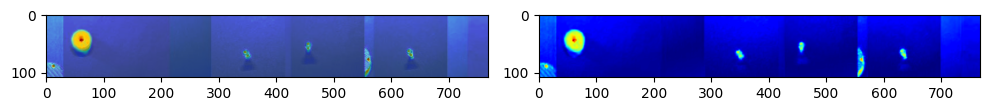

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
0 1000


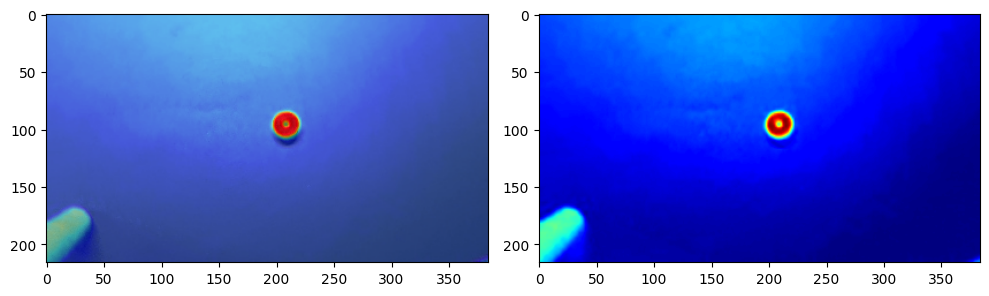

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
0 100


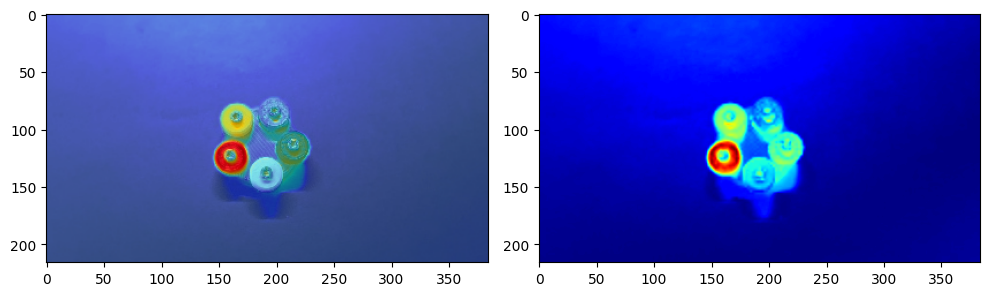

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
0 1400


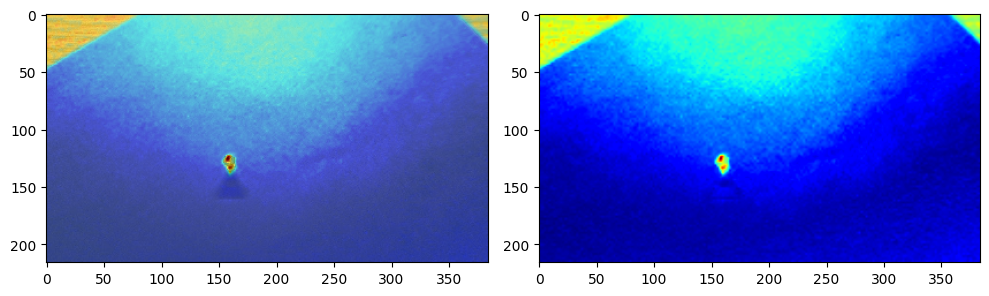

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
1 1000


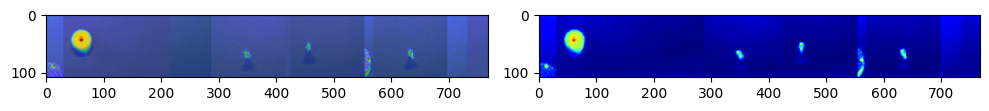

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
1 1000


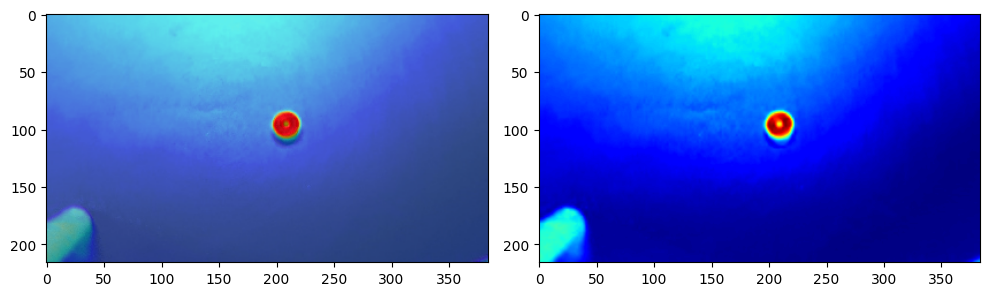

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
1 100


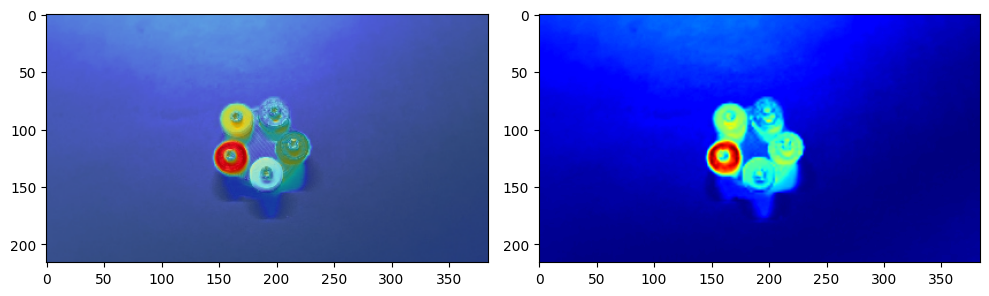

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
1 1400


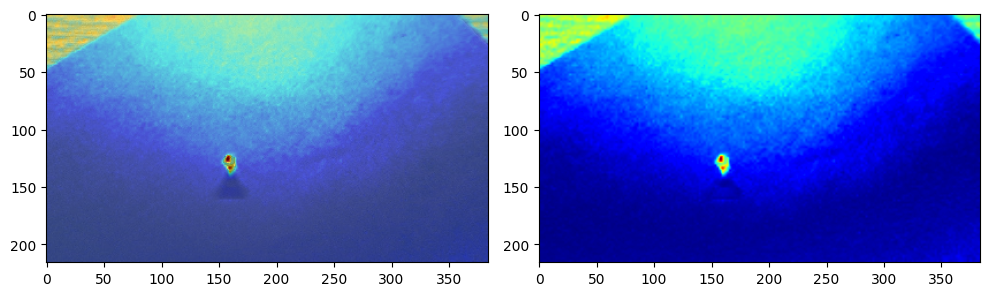

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
2 1000


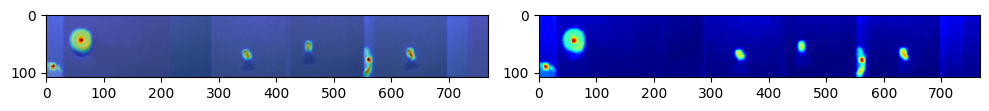

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
2 1000


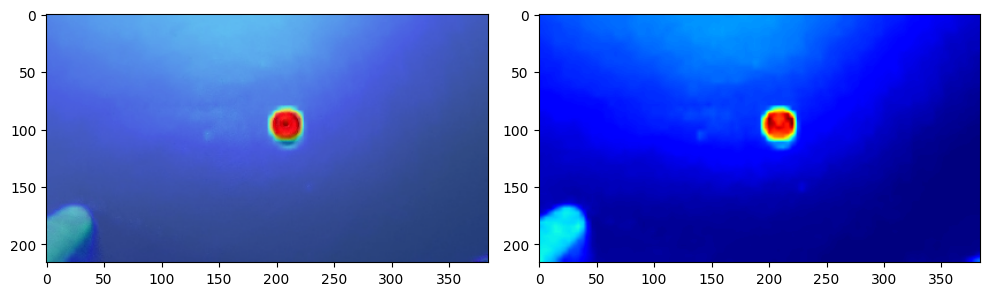

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
2 100


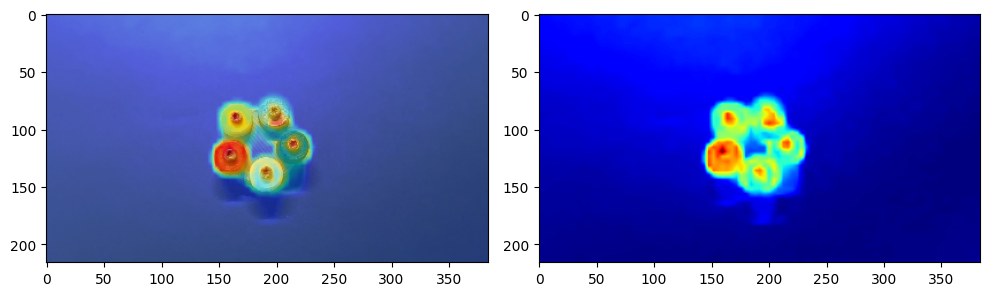

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
2 1400


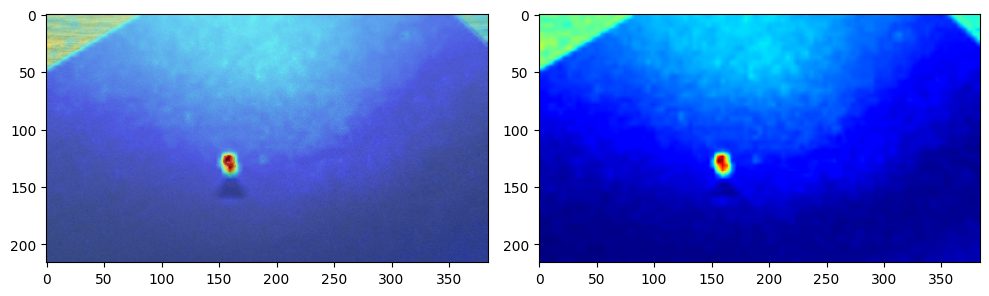

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
3 1000


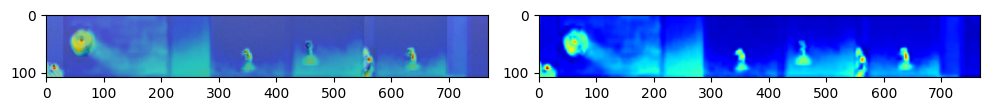

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
3 1000


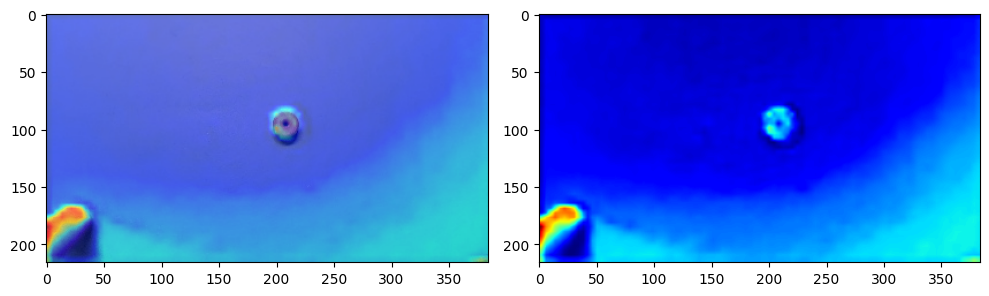

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
3 100


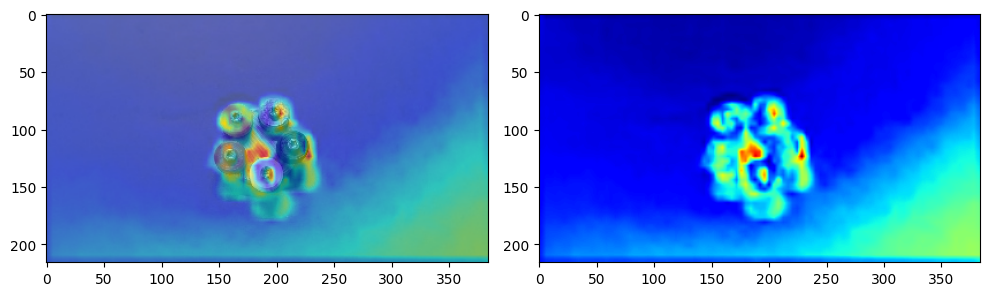

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
3 1400


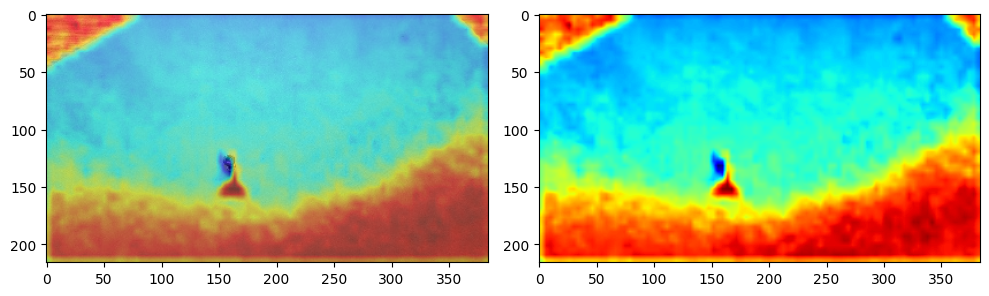

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
4 1000


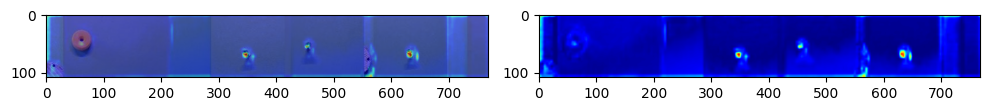

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
4 1000


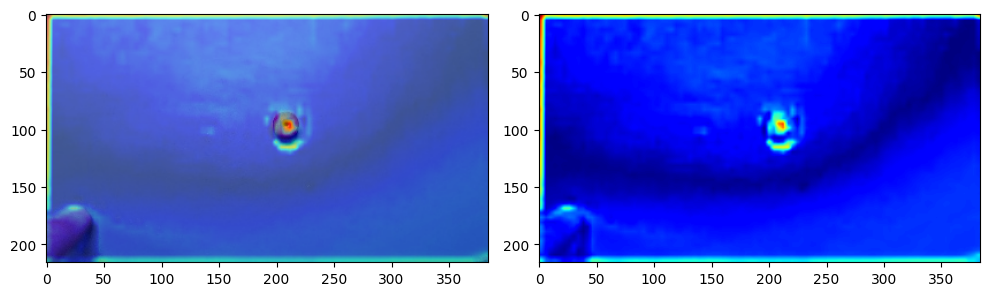

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
4 100


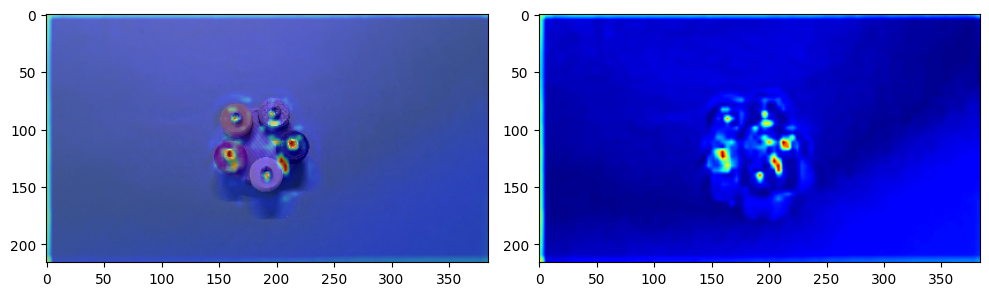

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
4 1400


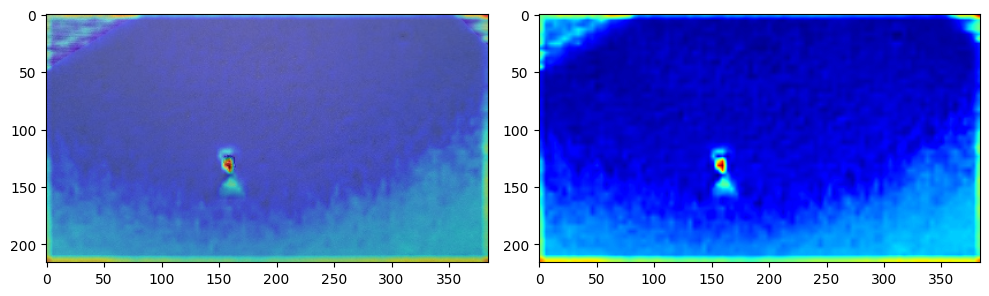

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
5 1000


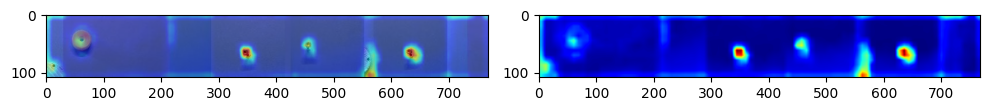

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
5 1000


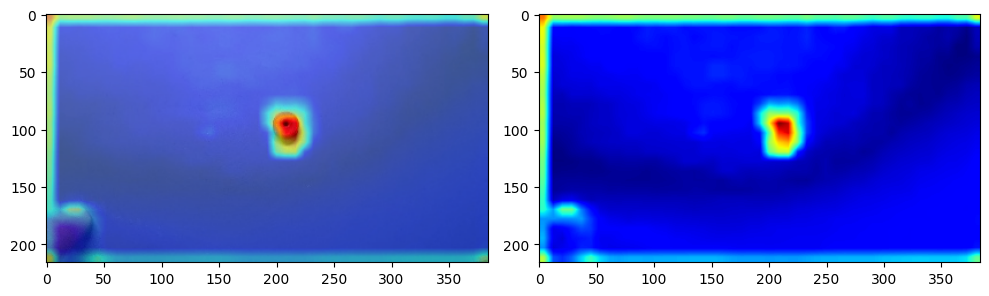

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
5 100


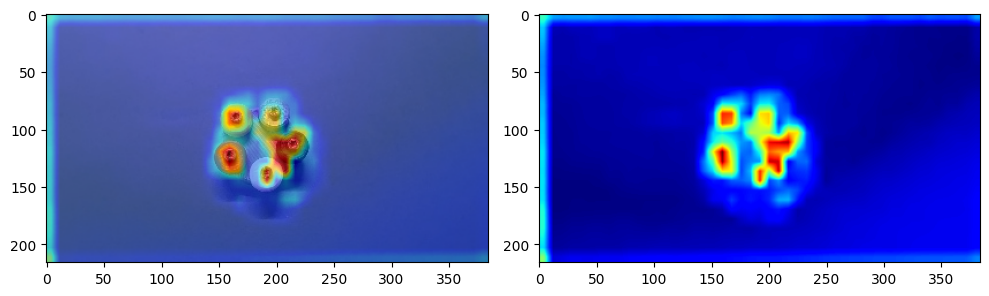

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
5 1400


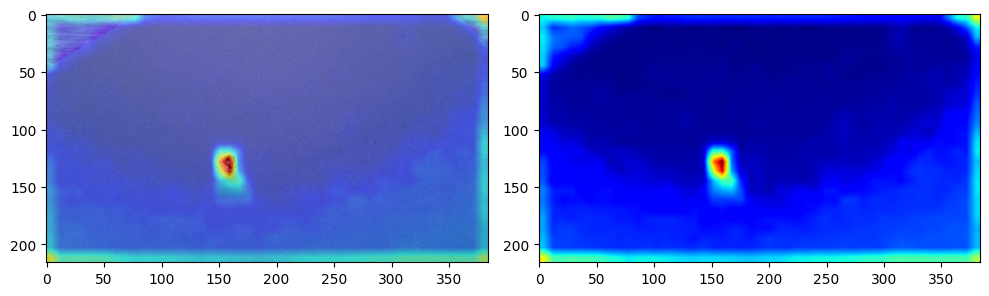

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
6 1000


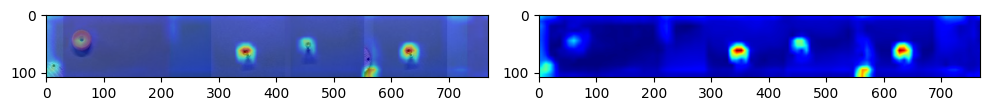

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
6 1000


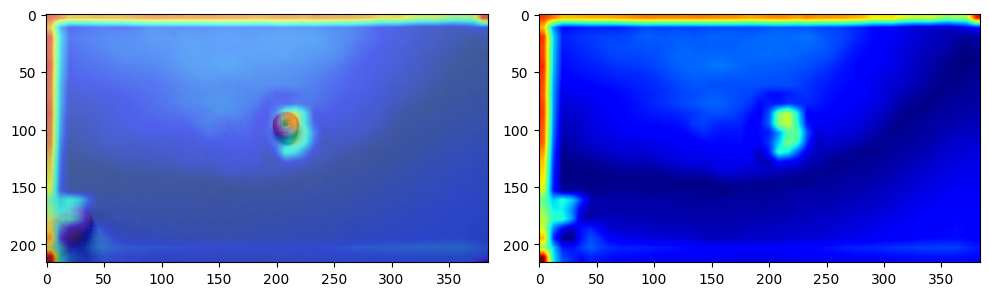

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
6 100


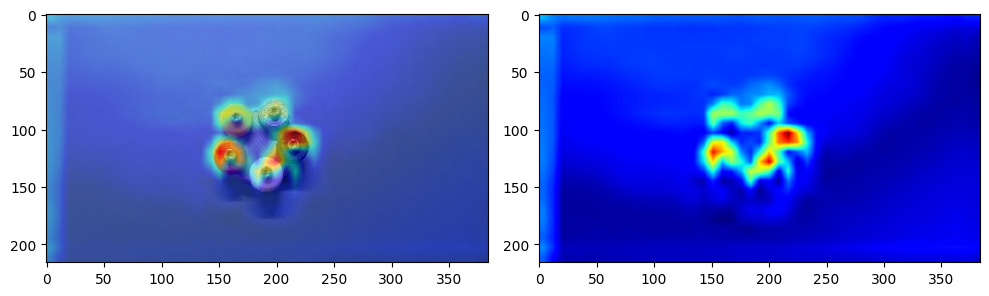

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
6 1400


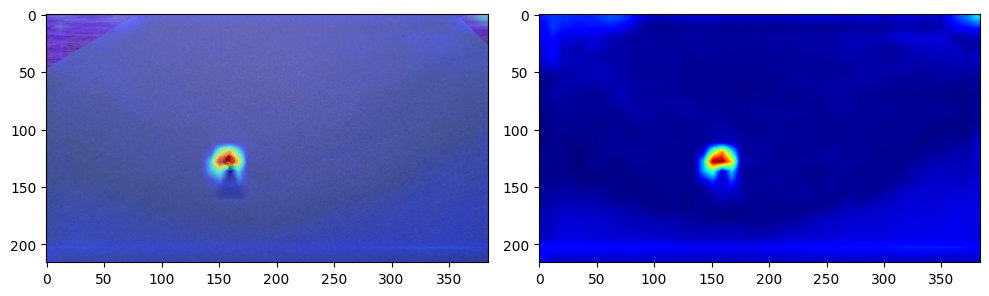

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
7 1000


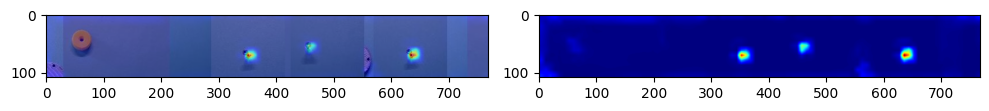

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
7 1000


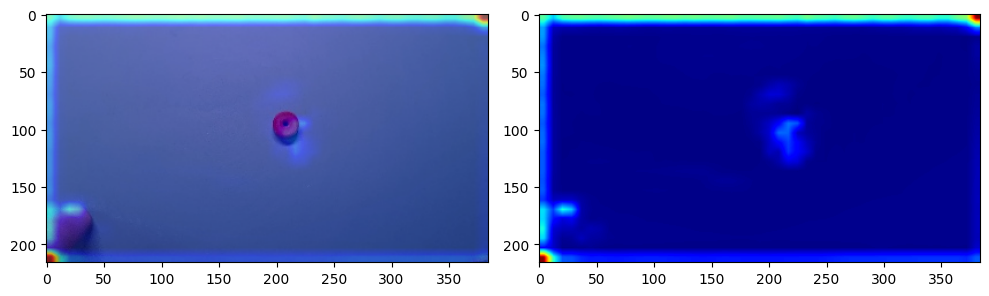

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
7 100


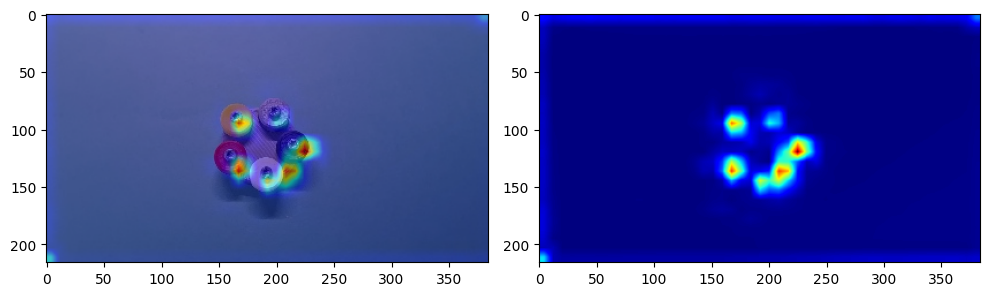

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
7 1400


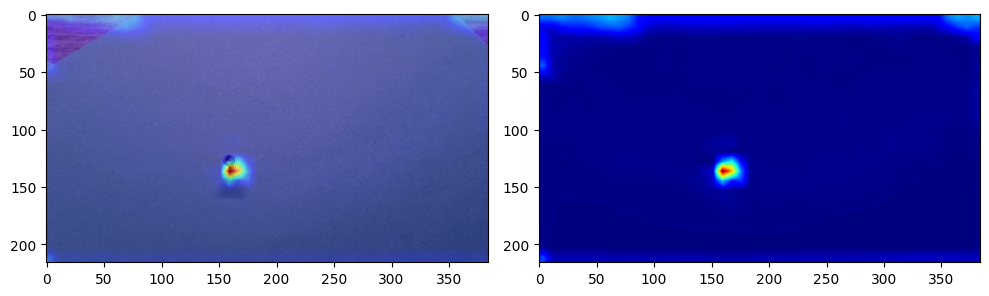

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
8 1000


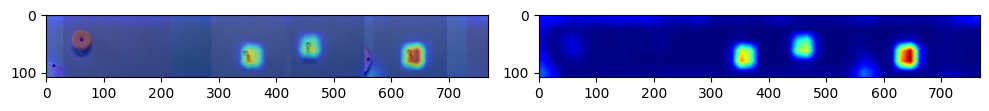

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
8 1000


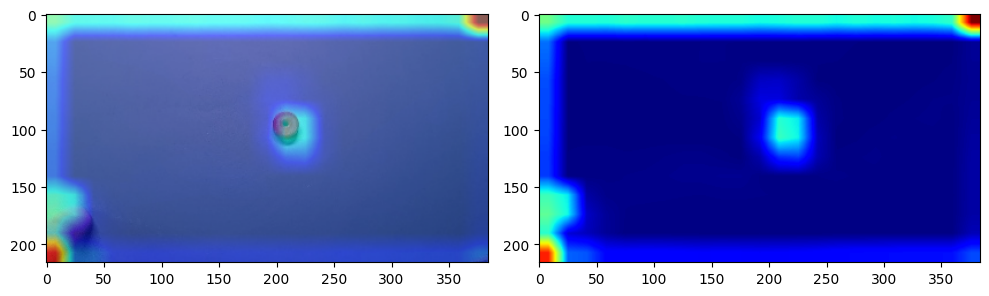

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
8 100


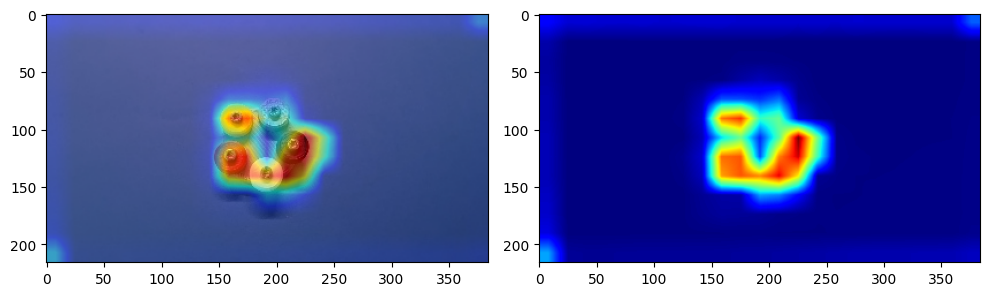

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
8 1400


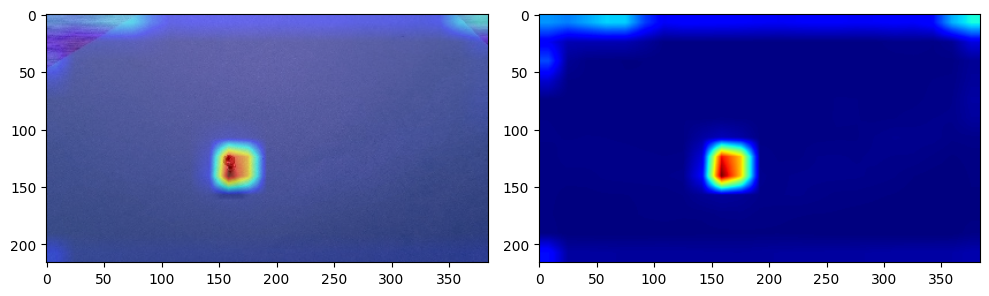

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
9 1000


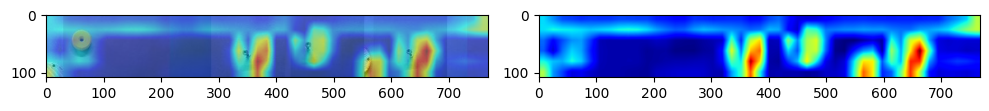

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
9 1000


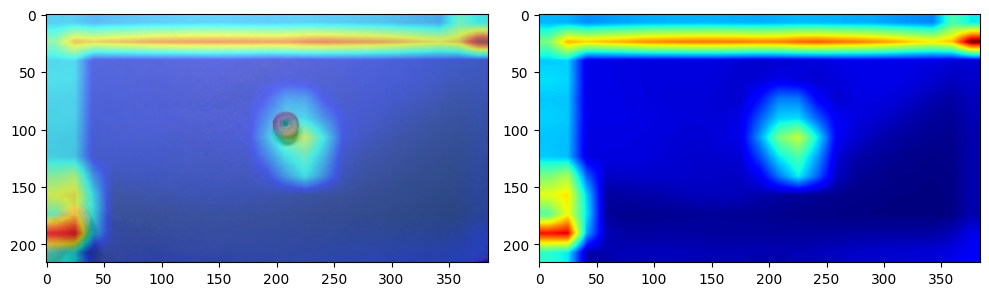

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
9 100


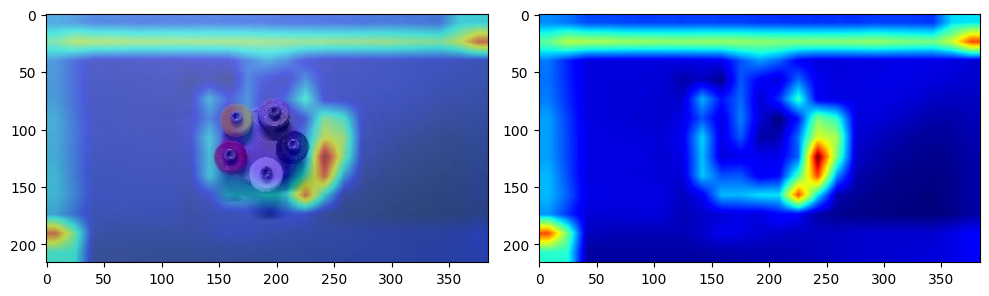

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
9 1400


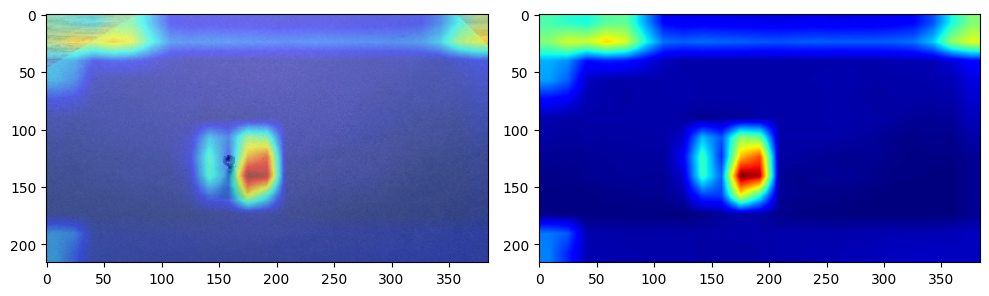

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
10 1000


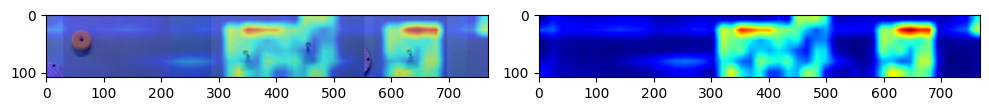

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
10 1000


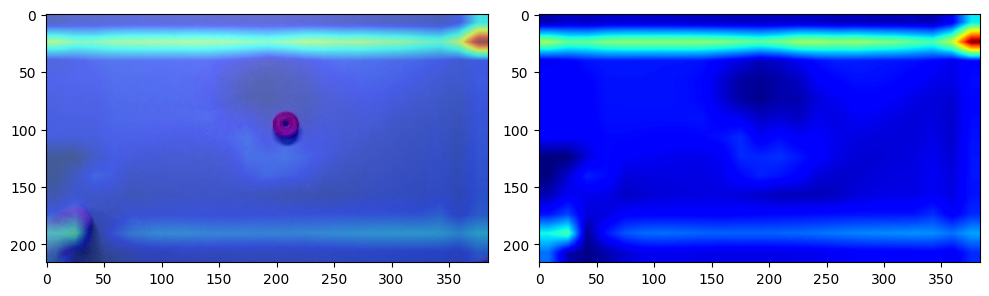

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
10 100


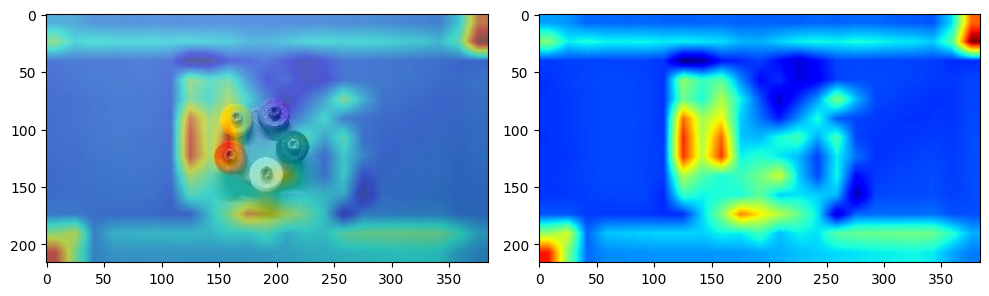

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
10 1400


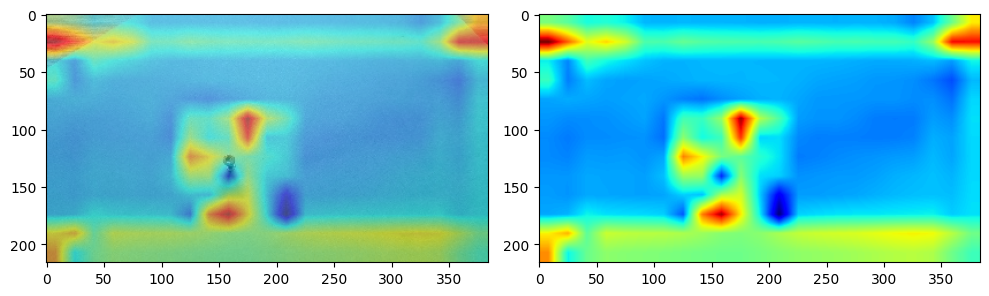

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
11 1000


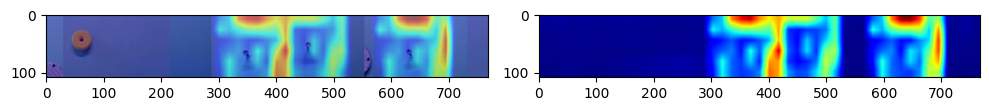

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
11 1000


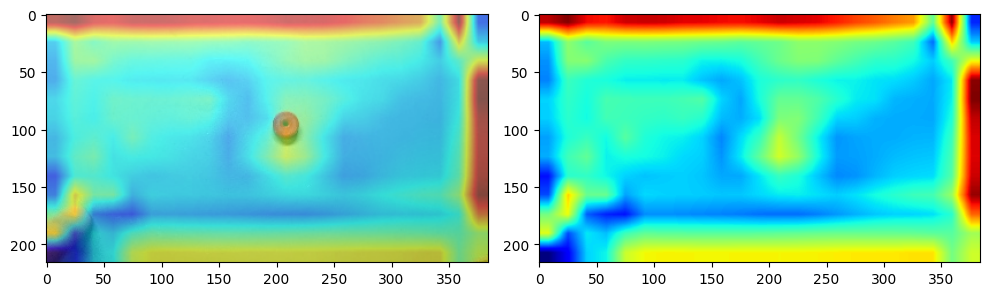

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
11 100


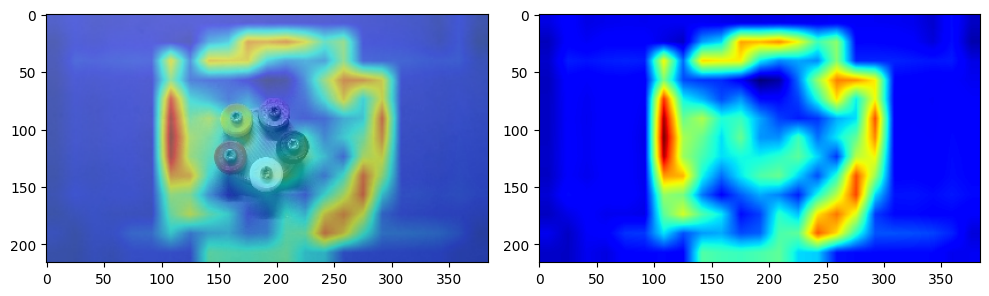

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
11 1400


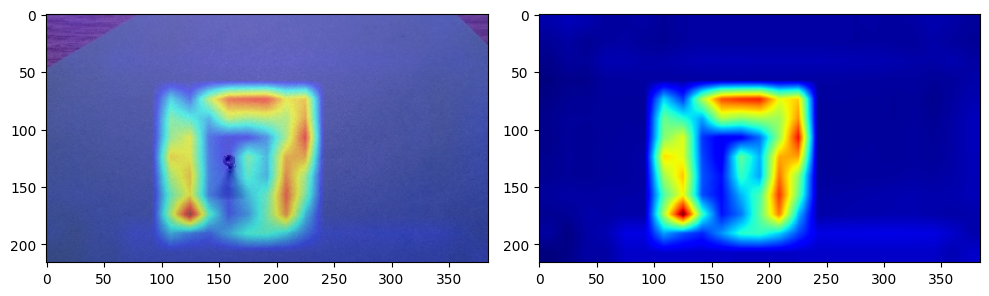

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
12 1000


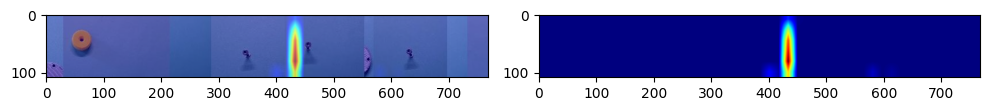

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
12 1000


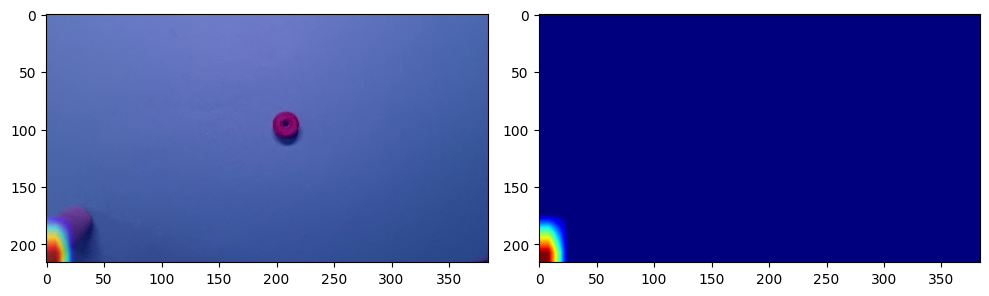

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
12 100


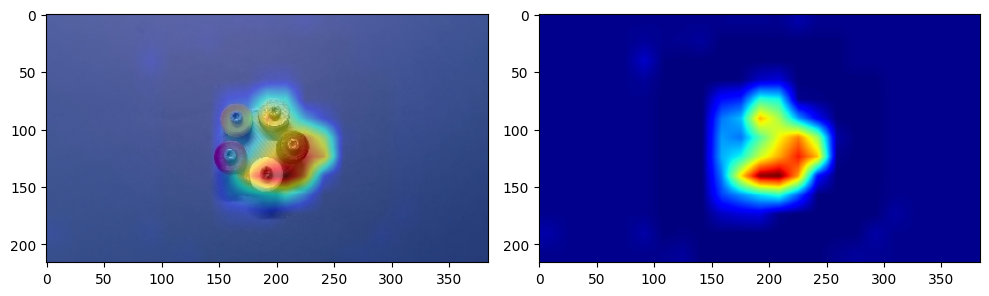

./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h screw
12 1400


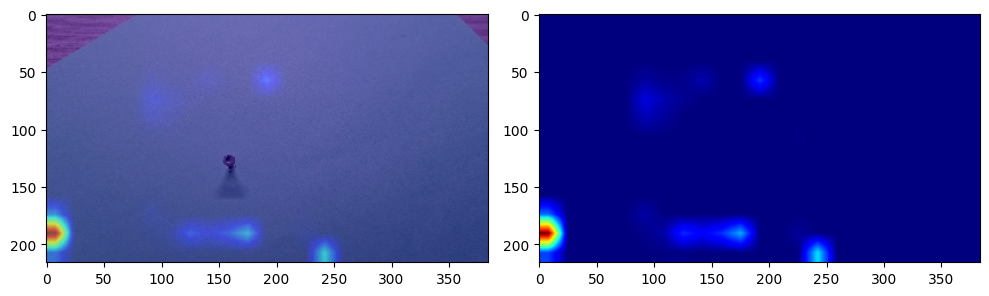

In [2]:
tests = []
tests.append(["./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h", "screw", [1000]])
tests.append(["./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h", "screw", [1000], "./data/temp/wheels_five/scale_0.2/"])
tests.append(["./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h", "screw", [100], "./data/temp/wheels_five/scale_0.2/"])
tests.append(["./data/temp/counting_imgs/wheels_five/scale_0.2/screw/2_3/h", "screw", [1400], "./data/temp/wheels_five/scale_0.2/"])

for i in range(13):
    for tst in tests:
        print(tst[0], tst[1])
        if type(tst[2]) != list:
            tst[2] = [tst[2]]        
        real_files = None
        if len(tst) > 3:
            real_files = tst[3]
        for pic in tst[2]:
            print(i, pic)
            gradcam(tst[0], tst[1], i, pic, real_files)